In [ ]:
#Code to Import Libraries and Connection to Google Drive
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Dataset/'

Mounted at /content/drive


In [ ]:
#Main file to do all the Experimentation
df_V41 = pd.read_csv(path+'dataV4.1.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_V5 = df_V41
df_V5 = df_V5.iloc[: , 1:]#Removing first Unnamed Column
df_V5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42367 entries, 0 to 42366
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age range                                 39887 non-null  object
 1   Type                                      42367 non-null  object
 2   Part of a policing operation              41249 non-null  object
 3   Gender                                    39603 non-null  object
 4   Self-defined ethnicity                    42339 non-null  object
 5   Officer-defined ethnicity                 40468 non-null  object
 6   Legislation                               41892 non-null  object
 7   Object of search                          40680 non-null  object
 8   Outcome                                   42367 non-null  object
 9   Outcome linked to object of search        42367 non-null  bool  
 10  Removal of more than just outer clothing  4236

In [ ]:
#Removing Null Values from Data
df_V5 = df_V5.dropna()
df_V5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33113 entries, 0 to 42366
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age range                                 33113 non-null  object
 1   Type                                      33113 non-null  object
 2   Part of a policing operation              33113 non-null  object
 3   Gender                                    33113 non-null  object
 4   Self-defined ethnicity                    33113 non-null  object
 5   Officer-defined ethnicity                 33113 non-null  object
 6   Legislation                               33113 non-null  object
 7   Object of search                          33113 non-null  object
 8   Outcome                                   33113 non-null  object
 9   Outcome linked to object of search        33113 non-null  bool  
 10  Removal of more than just outer clothing  3311

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33113 entries, 0 to 42366
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Age range                                 33113 non-null  object
 1   Type                                      33113 non-null  object
 2   Part of a policing operation              33113 non-null  object
 3   Gender                                    33113 non-null  object
 4   Self-defined ethnicity                    33113 non-null  object
 5   Officer-defined ethnicity                 33113 non-null  object
 6   Legislation                               33113 non-null  object
 7   Object of search                          33113 non-null  object
 8   Outcome                                   33113 non-null  object
 9   Outcome linked to object of search        33113 non-null  bool  
 10  Removal of more than just outer clothing  3311

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Feature 0: 211.028949
Feature 1: 180.098433
Feature 2: 6.175624
Feature 3: 2.341964
Feature 4: 234.050330
Feature 5: 71.898767
Feature 6: 167.605752
Feature 7: 631.931002
Feature 8: 1574.667816
Feature 9: 19.308311
Feature 10: 57.425284
Feature 11: nan
Feature 12: 15.442341


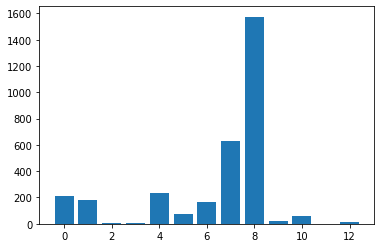

In [ ]:
#chi squared feature selection for categorical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
#Feature Selection Method
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# Data Split
df_V5.info()
X = df_V5
X = X.drop('Outcome', 1)
X = X.drop('Date', 1)
X.info()
Y = df_V5[['Outcome']]

 
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 211.028949
Feature 1: 180.098433
Feature 2: 6.175624
Feature 3: 2.341964
Feature 4: 234.050330
Feature 5: 71.898767
Feature 6: 167.605752
Feature 7: 631.931002
Feature 8: 1574.667816
Feature 9: 19.308311
Feature 10: 57.425284
Feature 11: nan
Feature 12: 15.442341


Combined Image of Feature Score, County is NAN because it only contains 1 Value

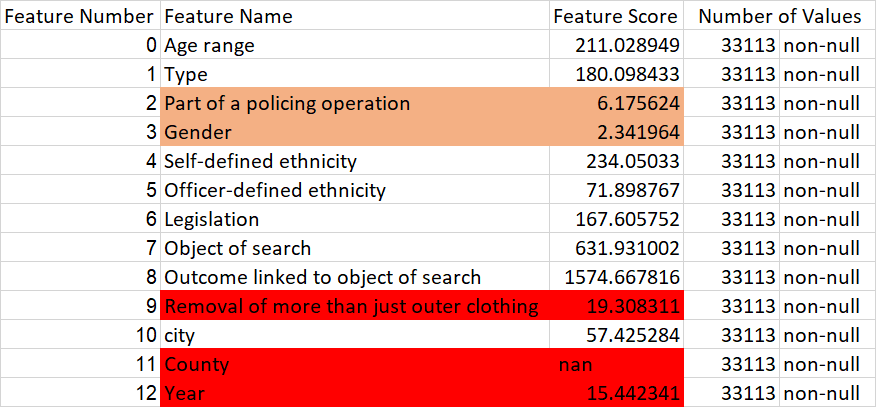

Based on the Feature Score we can Drop The Feature No 2,3,9,11,12 which are: Part of a policing operation,Gender,Removal of more than just outer clothing,County,Year
Note: These Features have feature score less than 50

After this we will remove the Nulls from other Columns to see what are the results If we can get more rows

In [ ]:
df_V41.info()
df_fs = df_V41[['Age range','Type','Officer-defined ethnicity','Legislation','Object of search','Outcome linked to object of search','city','Outcome']]
df_fs.info()#Total 8 Variables
#Removing Null values to see if we have more than 33113 rows
df_fs = df_fs.dropna()
df_fs.info()#By removing the Null values after selecting the features we have 34497 rows instead of 33113 which are 1384 more row
X = df_fs[['Age range','Type','Officer-defined ethnicity','Legislation','Object of search','Outcome linked to object of search','city']]
Y = df_fs[['Outcome']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42367 entries, 0 to 42366
Data columns (total 16 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Unnamed: 0                                42367 non-null  int64 
 1   Age range                                 39887 non-null  object
 2   Type                                      42367 non-null  object
 3   Part of a policing operation              41249 non-null  object
 4   Gender                                    39603 non-null  object
 5   Self-defined ethnicity                    42339 non-null  object
 6   Officer-defined ethnicity                 40468 non-null  object
 7   Legislation                               41892 non-null  object
 8   Object of search                          40680 non-null  object
 9   Outcome                                   42367 non-null  object
 10  Outcome linked to object of search        4236

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

Model Experimentation

In [ ]:
#ONE Hot Encoding Class Modification
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X=X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns=new_columns, index=X.index)
        return d_out
    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)    


In [ ]:
encoder = OneHotEncoder()
onehot_encoded_X = encoder.fit_transform(X)
onehot_encoded_X.info()
onehot_encoded_X.head()
# onehot_encoded_Y = encoder.fit_transform(Y)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34497 entries, 0 to 42366
Data columns (total 32 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Age range_10-17                                                34497 non-null  float64
 1   Age range_18-24                                                34497 non-null  float64
 2   Age range_25-34                                                34497 non-null  float64
 3   Age range_over 34                                              34497 non-null  float64
 4   Age range_under 10                                             34497 non-null  float64
 5   Type_Person and Vehicle search                                 34497 non-null  float64
 6   Type_Person search                                             34497 non-null  float64
 7   Officer-defined ethnicity_Asian                           

,Age range_10-17,Age range_18-24,Age range_25-34,Age range_over 34,Age range_under 10,Type_Person and Vehicle search,Type_Person search,Officer-defined ethnicity_Asian,Officer-defined ethnicity_Black,Officer-defined ethnicity_Other,...,Object of search_Stolen goods,Outcome linked to object of search_False,Outcome linked to object of search_True,city_Bradford,city_Calderdale,city_Craven,city_Doncaster,city_Kirklees,city_Leeds,city_Wakefield
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.20
#Startification with respect to the Y so that the same percentage of all the classes will go in the test and train data
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded_X, Y, test_size=test_size, random_state=seed,stratify=Y)
y_train.value_counts()

Outcome           
Nothing Suspicious    17511
Detained               5279
Warning                4807
dtype: int64

In [ ]:
# fit model on XGBoost
model = XGBClassifier()
result = model.fit(X_train, y_train)
print(result)
# model.history()

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(objective='multi:softprob')


In [ ]:
# Performance Matrices
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))# Confusion Matrix
from sklearn.metrics import accuracy_score
print("Model Accuracy")
print(accuracy_score(y_test, y_pred))# Accuracy
from sklearn.metrics import recall_score
print("Recall")
print(recall_score(y_test, y_pred, average=None))# Recall
from sklearn.metrics import precision_score
print("Precision")
print(precision_score(y_test, y_pred, average=None))# Precision

#F1 Score Measurement: Classification report [BONUS]
from sklearn.metrics import classification_report
print("Model Classification Report")
print(classification_report(y_test, y_pred, target_names=Y.Outcome.unique()))

Confusion Matrix
[[ 375  644  301]
 [ 170 3972  236]
 [ 155  541  506]]
Model Accuracy
0.7033333333333334
Recall
[0.28409091 0.90726359 0.42096506]
Precision
[0.53571429 0.77021524 0.48513902]
Model Classification Report
                    precision    recall  f1-score   support

Nothing Suspicious       0.54      0.28      0.37      1320
          Detained       0.77      0.91      0.83      4378
           Warning       0.49      0.42      0.45      1202

          accuracy                           0.70      6900
         macro avg       0.60      0.54      0.55      6900
      weighted avg       0.68      0.70      0.68      6900

